# Task 2. Search for Country and Institute

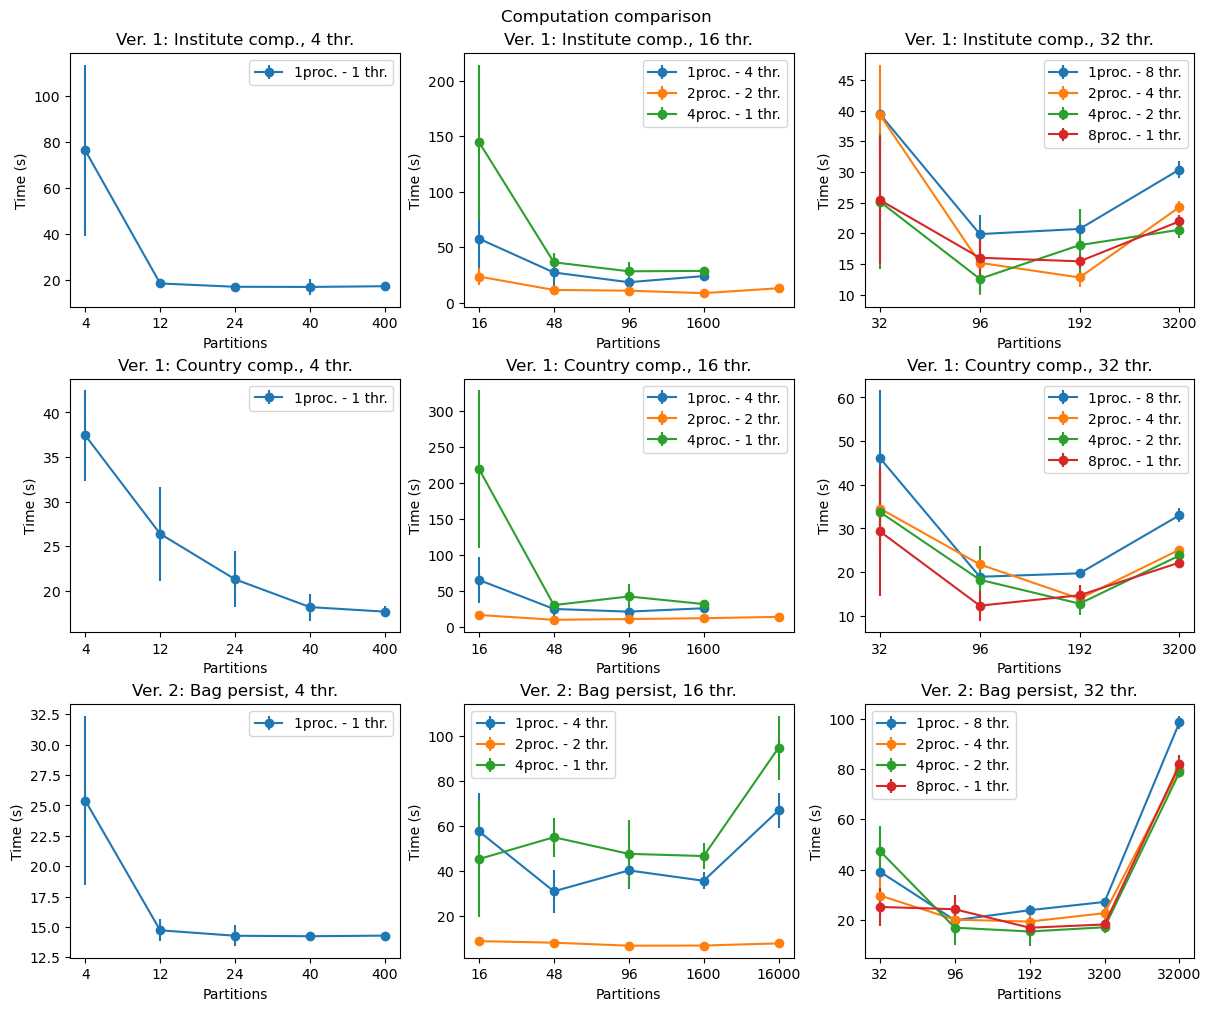

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(12,10),layout='constrained')
fig.suptitle('Computation comparison')
threads=[ 4,16, 32]
for i in range(3):
    f.plot_performances(f'bm/bm_2_compute_institute{threads[i]}.csv',0,i,ax, title='Ver. 1: Institute comp.')
    f.plot_performances(f'bm/bm_2_compute_country{threads[i]}.csv',1,i,ax, title='Ver. 1: Country comp.')
    f.plot_performances(f'bm/bm_2_persist_bag{threads[i]}.csv',2,i,ax, title='Ver. 2: Bag persist')

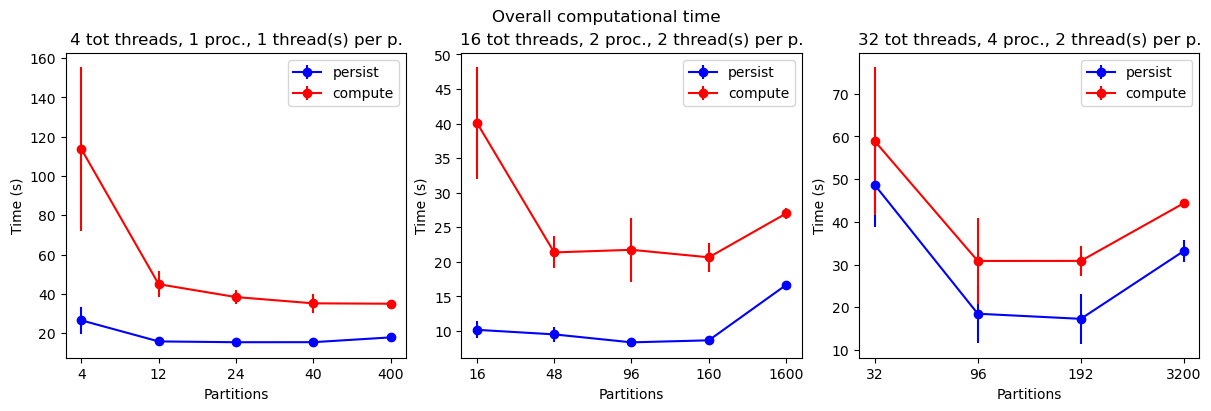

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(12,4),layout='constrained')
fig.suptitle('Overall computational time')
threads=[4,16,32]
workers=[1,2,4]
for i in range(3):
    df1=pd.read_csv(f'bm/bm_2_persist_bag{threads[i]}.csv')
    df2=pd.read_csv(f'bm/bm_2_persist_country{threads[i]}.csv')
    df3=pd.read_csv(f'bm/bm_2_persist_institute{threads[i]}.csv')
    df1=df1[df1['n_partitions']<=15000]
    df2=df2[df2['n_partitions']<=15000]
    df3=df3[df3['n_partitions']<=15000]
    
    df1['time1']=df1['time1']+df2['time1']+df3['time1']
    df1['time2']=df1['time2']+df2['time2']+df3['time2']
    df1['time3']=df1['time3']+df2['time3']+df3['time3']

    df2=pd.read_csv(f'bm/bm_2_compute_country{threads[i]}.csv')
    df3=pd.read_csv(f'bm/bm_2_compute_institute{threads[i]}.csv')

    df2['time1']=df2['time1']+df3['time1']
    df2['time2']=df2['time2']+df3['time2']
    df2['time3']=df2['time3']+df3['time3']

    df1=df1[df1['n_workers']==workers[i]]
    df2=df2[df2['n_workers']==workers[i]]

    df1['mean']=(df1['time1']+df1['time2']+df1['time3'])/3
    df2['mean']=(df2['time1']+df2['time2']+df2['time3'])/3
    df1['std']=np.round(np.std([df1['time1'],df1['time2'],df1['time3']],axis=0),2)
    df2['std']=np.round(np.std([df2['time1'],df2['time2'],df2['time3']],axis=0),2)
        
    ax[i].errorbar(x=range(len(df1['n_partitions'])),y=df1['mean'],yerr=df1['std'],label=f'persist',fmt='o-',c='b')
    ax[i].errorbar(x=range(len(df2['n_partitions'])),y=df2['mean'],yerr=df2['std'],label=f'compute',fmt='o-',c='r')
    thr=int(threads[i]/4 /workers[i])
    ax[i].set_title(f'{threads[i]} tot threads, {workers[i]} proc., {thr} thread(s) per p.')
    ax[i].set_xlabel('Partitions')
    ax[i].set_ylabel('Time (s)')
    ax[i].set_xticks(range(len(df1['n_partitions'])))
    ax[i].set_xticklabels(np.array(df1['n_partitions'],dtype=int))
    ax[i].legend()
      